# Проект Телекоммуникации

## Описание проекта: 
Оператор связи **«Ниединогоразрыва.ком»** хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.<br>
<br>**Описание услуг**<br>
Оператор предоставляет два основных типа услуг: 
- Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).<br>
<br>

**Дополнительные услуги**
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**План проекта**

1. Загрузка данных:
- загрузка необходимых библиотек;
- установление константы random_state = 30723;
- выгрузка в стационаре и в самом тренажере;
- первичный осмотр данных методами info(), isna(), head(), describe().
2. Предобработка данных:
- соответсвие типов данных;
- работа с дубликатами;
- заполнение пропусков;
- исследовательский анализ;
- проверка на мультиколлинеарность.
3. Обучение моделей:
- разбиение выборок(тренировочная и тестовая 75:25 соответственно);
- кодирование;
- масштабирование;
- обучение 3 моделей (Logistic Regression, Decision Tree, Catboost).
- показатель метрики AUC-ROC должен быть выше 0.85
4. Проверка тестовых данных на модели с лучшим показателем метрики.
5. Анализ важности признаков и построение матрицы ошибок.
6. Общие выводы.

**Архив данных и содержание файлов:**<br><br>
`contract_new.csv` — информация о договоре;<br>
`personal_new.csv` — персональные данные клиента;<br>
`internet_new.csv` — информация об интернет-услугах;<br>
`phone_new.csv` — информация об услугах телефонии.<br>

**Описание полей данных:** <br><br>
`BeginDate` – дата начала пользования услугами.<br>
`EndDate` – дата окончания пользования услугами.<br>
`Type` – тип оплаты: ежемесячный, годовой и тд.<br>
`PaperlessBilling` – безналичный расчет.<br>
`PaymentMethod` – способ оплаты.<br>
`MonthlyCharges` – ежемесячные траты на услуги.<br>
`TotalCharges` – всего потрачено денег на услуги.<br>
`Dependents` – наличие иждивенцев.<br>
`Senior Citizen` – наличие пенсионного статуса по возрасту.<br>
`Partner` – наличие супруга(и).<br>
`MultipleLines` – наличие возможности ведения параллельных линий во время звонка.<br>
<br>
`customerID` - код клиента во всех файлах. <br>
*Информация о договорах актуальна на 1 февраля 2020.*


## 1. Загрузка данных

In [1]:
!pip3 install catboost

In [2]:
!pip install scikit-learn==1.1.3

In [3]:
!pip install pandas-profiling[notebook]

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import catboost as cb

from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

RANDOM_STATE = 30723

/tmp/ipykernel_213/3966446570.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [5]:
try:
    contract = pd.read_csv('/datasets/contract_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv')
    personal = pd.read_csv('/datasets/personal_new.csv')
    phone = pd.read_csv('/datasets/phone_new.csv')
except:
    contract = pd.read_csv('/Users/Julli/Desktop/JUL/DS/ВЫПУСКНОЙ ПРОЕКТ ТЕЛЕКОМ/contract_new.csv')
    internet = pd.read_csv('/Users/Julli/Desktop/JUL/DS/ВЫПУСКНОЙ ПРОЕКТ ТЕЛЕКОМ/internet_new.csv')
    personal = pd.read_csv('/Users/Julli/Desktop/JUL/DS/ВЫПУСКНОЙ ПРОЕКТ ТЕЛЕКОМ/personal_new.csv')
    phone = pd.read_csv('/Users/Julli/Desktop/JUL/DS/ВЫПУСКНОЙ ПРОЕКТ ТЕЛЕКОМ/phone_new.csv')

In [6]:
def total_info(data):
    print('__________________________')
    print('Общая информация')
    print(data.info());
    print('__________________________')
    print('Количество пропусков')
    print(data.isna().sum());
    print('__________________________')
    print('Количество дубликатов')
    print(data.duplicated().sum());
    print('__________________________')
    print('Первые 10 строк')
    print(data.head(10));
    print('__________________________')
    print('Распределение значений  данных')
    print(data.describe());

In [7]:
total_info(contract)

__________________________
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
__________________________
Количество пропусков
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
__________________________
Количество дубликатов
0
__________________________
Первые

In [8]:
total_info(internet)

__________________________
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None
__________________________
Количество пропусков
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
__________________________
Количество дубликатов
0
__________________________
Первые 10 строк
   customerI

In [9]:
total_info(personal)

__________________________
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
__________________________
Количество пропусков
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
__________________________
Количество дубликатов
0
__________________________
Первые 10 строк
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    M

In [10]:
total_info(phone)

__________________________
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None
__________________________
Количество пропусков
customerID       0
MultipleLines    0
dtype: int64
__________________________
Количество дубликатов
0
__________________________
Первые 10 строк
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes
5  7892-POOKP           Yes
6  6388-TABGU            No
7  9763-GRSKD            No
8  7469-LKBCI            No
9  8091-TTVAX           Yes
__________________________
Распределение значений  данных
        customerID MultipleLines
count         6361          6361
unique 

Вывод:
1. Количество клиентов 7043 - эта цифра должна будет получиться в итоговой собранной таблице. <br>
Решение объединить таблицы основано на относительно небольшом кол-ве данных. Общий столбец для всех датасетов customerID.
2. Датасеты `internet` и `phone` имеют меньшее кол-во строк, отсюда делаем вывод, что будут необходимы заглушки. 
3. Количество `пропусков` во всех датасетах равно `нулю`. 
4. Дубликаты стоит просматривать непосредственно в итоговой таблице.
5. Необходимо привести столбцы с датой `BeginDate` и `EndDate` к типу `datetime`,  столбец `TotalCharges` из типа 'object' в тип `float`, т.к. в нем хранятся числовые данные с плавающей точкой.
6. Значения столбца `MultipleLines` `No` - это лишь говорит об отсутствии возможности ведения параллельных линий во время звонка. Далее при слиянии таблиц появятся пропуски и нужна будет другая заглушка.

Вопрос 1: стоит ли проверять на мультиколлинеарность, если в дальнейшем планирую брать модель решающего дерева и сатбуст, которые к мультиколлинеарности не чувствительны?<br>
Вопрос 2: все таки мы исследуем показатель того, что клиент ушел, значит там где будет дата(в дальнейшем 1) в EndDate?

## 2. Предобработка данных
Начнем с изменения типов данных на верные.

In [11]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')

Перед тем как приводить столбец `EndDate` к тому же формату необходимо заменить 'No' на дату окончания информации в датасетах - это 2020.02.01<br>
Потом этот столбец нам не понадобится, поэтому сразу сделаем его копию и назовем `Target`. Приведем столбец к бинарному типу.

In [12]:
contract['Target'] = contract.loc[:, 'EndDate']
contract.loc[contract['Target'] != 'No', 'Target'] = '1'
contract.loc[contract['Target'] == 'No', 'Target'] = '0'
contract['Target'] = pd.to_numeric(contract['Target'])

In [13]:
contract.loc[contract['EndDate'] == 'No', 'EndDate'] = '2020-02-01'
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format='%Y-%m-%d')

Перед изменением типа данных в столбце `TotalCharges` нужно обработать пустые значения **" "** Рассмотрим у каких клиентов такие записи в столбце

In [14]:
contract.query('TotalCharges == " "')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Target
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,0


Клиенты с пустыми значениями - это те, кто только начал пользоваться услугами. Заменять пропуски на значения месячных трат не верно, ведь аероятно не прошел даже 1 день. Поэтому считаем правильным заменить пропуски на `0.00`(все остальные значения в столбце с плавающей точкой)

In [15]:
contract.loc[contract['TotalCharges'] == " ", 'TotalCharges'] = '0.00'
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'])

Проверим верно ли теперь указаны типы данных.

In [16]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Target            7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 495.3+ KB


Перед тем как переходить к слиянию таблиц, стоит обозначить то, что пропуски, которые появятся мы заменим не на 'No', а на 'Unknown'. Чтобы, к примеру, значения в столбце MultipleLines не смешались. Ведь неизвестно пропуски это отсутствие услуги или столбцы появились позднее, чем первые клиенты.

In [17]:
full_archive = pd.merge(contract, internet, on='customerID', how='outer')
full_archive = pd.merge(full_archive, personal, on='customerID', how='outer')
full_archive = pd.merge(full_archive, phone, on='customerID', how='outer')

In [18]:
total_info(full_archive)

__________________________
Общая информация
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Target            7043 non-null   int64         
 9   InternetService   5517 non-null   object        
 10  OnlineSecurity    5517 non-null   object        
 11  OnlineBackup      5517 non-null   object        
 12  DeviceProtection  5517 non-null   object        
 13  TechSupport       5517 non-null   

`Дубликаты отсутсвуют`. Значит переходим к заполнению пропусков на значение `Unknown`, а также удалим не информативный для нас столбец `customerID`

In [19]:
full_archive['InternetService'].fillna('Unknown',inplace=True)
full_archive['OnlineSecurity'].fillna('Unknown',inplace=True)
full_archive['OnlineBackup'].fillna('Unknown',inplace=True)
full_archive['DeviceProtection'].fillna('Unknown',inplace=True)
full_archive['TechSupport'].fillna('Unknown',inplace=True)
full_archive['StreamingTV'].fillna('Unknown',inplace=True)
full_archive['StreamingMovies'].fillna('Unknown',inplace=True)
full_archive['MultipleLines'].fillna('Unknown',inplace=True)

In [20]:
full_archive.drop('customerID', axis= 1, inplace= True)

In [21]:
full_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   Target            7043 non-null   int64         
 8   InternetService   7043 non-null   object        
 9   OnlineSecurity    7043 non-null   object        
 10  OnlineBackup      7043 non-null   object        
 11  DeviceProtection  7043 non-null   object        
 12  TechSupport       7043 non-null   object        
 13  StreamingTV       7043 non-null   object        
 14  StreamingMovies   7043 n

Посчитатаем какое кол-во дней пробыл с нами тот или иной клиент.

In [22]:
full_archive['СlientDays'] = (full_archive['EndDate'] - full_archive['BeginDate']) / np.timedelta64 (1,'D')

In [23]:
full_archive['СlientDays'].describe()

count    7043.000000
mean      898.555729
std       683.130510
min         0.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: СlientDays, dtype: float64

Создадим категории для более подробного анализа.

In [24]:
full_archive['ClientCat'] = pd.cut(full_archive['СlientDays'], [0, 31, 182, 365, 1095, 10000],
                                    labels=['Месяц', 'Менее полугода', 'Пол года - год', '1-3 года', 'более 3 лет'])

Теперь удалим столбцы с BeginDate и EndDate

In [25]:
full_archive.drop(['BeginDate','EndDate'], axis= 1 , inplace= True)

Теперь используем pandas_profiling для более тщательного EDA анализа.

In [26]:
full_archive.profile_report(title='Анализ общего архива',correlations={'phi_k':{'calculate': True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Общий вывод:
1. В первые ячейки кода добавили необходимые библиотеки и обновления. <br>
2. Заменили значения `NO` в столбце `EndDate` на дату выгрузки датасетов `2020-02-01` и заполнили пустые значения в столбце `TotalCharges` на значения `0.00` (т.к. клиент пробыл с нами всего 1 день и данных недостаточно). А также создали столбец `Target` и привели его к бинарному типу, где 0 - клиент остался, 1 - клиент ушел. <br>
3. Изменили типы данных на верные для столбцов `BeginDate`, `EndDate` и `TotalCharges`. <br>
4. Соединили все таблицы в новый датасет - `full_archive`. Проверили все ли данные сохранились. В итоге имеет `7043` строки и `21` столбец. Удалили неинформативный столбец `customerID` <br>
5. Образовавшиеся после слияния пропуски заполнили значениями unknown, т.к. сделали предположение, что клиенты появились ранее чем услуги и просто не прописывали эти столбцы. Имеет место последующее уточнение у команды почему возникли пропуски. <br>
6. Создали столбец `СlientDays` и в нем записали кол-во дней, которое абонент является нашим клиентом. Далее создали столбец `ClientCat` и объединили клиентов по категориям. Столбцы `BeginDate` и `EndDate` удалили. <br>
7. Полный датасет теперь содержит 20 столбцов.Дубликаты и пропуски отстутсвуют.<br>
Подробный отчет о графиках и особенностях по каждому столбцу
- `Type` Большинство клиентов (55%) предпочитают оплату `Month-to-month`. Остальные выбирают оплату раз в год или раз в два (24.1% и 20.9% соответственно)
- `PaperlessBilling` Почти 60% выбирают безналичный расчёт.
- `PaymentMethod` Приоритетный вариант способа оплаты - электронный чек (33.6%), остальные поделились примерно поровну по 22%. 
- Гистограмма для `MonthlyCharges` показывает резкий всплеск в ежемесячных трат на услуги в самом начале, затем такой же резкий спад и в итоге приходит к стабильной медиане (около 70.35)
-  Гистограмма для `TotalCharges` показывает плавный спад на протяжении всего периода. 
- 15.6% из общей базы ушли из компании (`Target`)
- Лидером в Интернет подключениях (`InternetService`) является оптическое волокно. Скорее всего пустые значения в этом столбце говорят об отсутствии подключения интернета для абонента.
- Большинство клиентов не используют блокировку небезопасных сайтов (`OnlineSecurity`).
- Такая же ситуация с облачным хранилищем файлов для резервного копирования данных (`OnlineBackup`), защитой устройств `DeviceProtection` и выделенной линией тех поддержки `TechSupport` - отказались 44%. 
- Стриминговое телевидение (`StreamingTV`) и каталог фильмов (`StreamingMovies`) используется клиентами 50 на 50.
- Присутствие мужчин и женщин `gender` среди клиентов можно сказать равно.  Пожилые `SeniorCitizen` из них лишь 16%. Клиенты с супругом `Partner` почти равно поделились с незамужними людьми. У 30% клиентов есть иждевенцы `Dependents`. 
- Разница всего 6% между использованием (42.2%) `MultipleLines` и не использованием (48.1%).
- График для столбца `ClientDays` выглядит зигзагообразно. Вероятнее всего на это повлияли тарифы по оплате в год или 2 года. Клиент в этот период просто не может уйти и продолжает использовать услуги. Кол-во клиентов (`ClientCat`), которые пользуются услугами более года составляет 68% от всех клиентов. 
8. На графике с проверкой на мультиколлинеарность мы видим:
- Обратные зависимости отсутствуют. 
- Сразу же в глаза бросается строка с `gender`. Он не связан ни с каким другим столбцом. Так что его мы удалим. Сюда же относятся столбцы `Dependents` и `SeniorCitizen`.
- Стобцы `ClientCat` и `ClientDays`, которые мы создали, естественно связаны между собой, а также связаны с таргетом на 0.195 и 0.287, соответсвенно удалим `ClientCat`.
- Так же есть сильная связь между `MonthlyCharges` и `InternetService`, `ClientDays` и `TotalCharges`. В целом все доп услуги типа телевиденья и безопасности связаны между собой.
- Самая **сильная связь с таргетом** у `ClientDays` **0.287** и `TotalCharges` **0.232**. Затем идут `MultipleLines` **0.174** и `MonthlyCharges` **0.173**.
- Мультиколлинеарность встречается между всеми признаками доп услуг. Таких как Стриминговое тв и фильмов, онлайн безопасность и поддержка т.д. Так как в дальнейшем планируем использовать модели не чувствительные к мультиколлинеарности, эти признаки мы не будем удалять.
9. Мы `наблюдаем дисбаланс классов целевого признака`. **85% клиентов** из базы **остались** и только **15% перестали пользоваться услугами**. При разделении на выборки будем использовать метод `stratify=target`.  Так же стоит отметить, что метрика ROC-AUC не чувствительна к смещению, поэтому балансировать данные нет необходимости.

In [27]:
full_archive.drop(['gender','Dependents','SeniorCitizen','ClientCat'], axis= 1 , inplace= True)

## 3. Обучение моделей
Нам необходимо достичь показателя метрики AUC-ROC выше 0.85. <br>
Начнем с выделения целевого признака и разбиения на выборки, тестовая 25% от общей, валидационная отсутствует.

In [28]:
features = full_archive.drop('Target', axis=1)
target = full_archive['Target']

In [29]:
features_train, features_test, target_train, target_test = \
train_test_split(features,target, test_size=0.25, random_state=RANDOM_STATE, stratify=target) 

print('Обучающая выборка', target_train.shape)
print('Тестовая выборка', target_test.shape)

Обучающая выборка (5282,)
Тестовая выборка (1761,)


Для дальнейшего кодирования столбцов выбираем `OHE`, а не `get_dummies`. Ведь новые значения в столбцах могут дополняться. <br>

In [30]:
ohe_features = features_train.select_dtypes(include='object').columns.to_list()
num_features = features_train.select_dtypes(exclude='object').columns.to_list()

encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore',sparse=False)
encoder_ohe.fit(features_train[ohe_features])

features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[ohe_features])
features_train = features_train.drop(ohe_features, axis=1)

scaler = StandardScaler()
features_train[num_features] = scaler.fit_transform(features_train[num_features])

features_train.head()

,MonthlyCharges,TotalCharges,СlientDays,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_Unknown,OnlineSecurity_Unknown,OnlineSecurity_Yes,OnlineBackup_Unknown,OnlineBackup_Yes,DeviceProtection_Unknown,DeviceProtection_Yes,TechSupport_Unknown,TechSupport_Yes,StreamingTV_Unknown,StreamingTV_Yes,StreamingMovies_Unknown,StreamingMovies_Yes,Partner_Yes,MultipleLines_Unknown,MultipleLines_Yes
5127,1.778923,0.612822,-0.114296,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1845,-0.957629,0.163724,1.754468,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1798,-1.274022,-0.562742,0.242216,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3206,-1.479429,-0.942894,-1.047947,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4041,-0.129374,0.318276,0.730228,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Теперь кодируем тестовую выборки энкодером, обученным на тренировочной выборке. Масштабтруем скелером также обученным на тренировочной выборке.

In [31]:
features_test[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_test[ohe_features])

features_test = features_test.drop(ohe_features, axis=1)

features_test[num_features] = scaler.transform(features_test[num_features])

features_test.head()

,MonthlyCharges,TotalCharges,СlientDays,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_Unknown,OnlineSecurity_Unknown,OnlineSecurity_Yes,OnlineBackup_Unknown,OnlineBackup_Yes,DeviceProtection_Unknown,DeviceProtection_Yes,TechSupport_Unknown,TechSupport_Yes,StreamingTV_Unknown,StreamingTV_Yes,StreamingMovies_Unknown,StreamingMovies_Yes,Partner_Yes,MultipleLines_Unknown,MultipleLines_Yes
4985,0.617711,0.807418,0.727306,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3527,0.329478,-0.926309,-1.226203,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2611,0.187019,-0.601678,-0.783486,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2575,-1.504276,-0.681771,0.242216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
161,0.587894,-0.087920,-0.291090,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [32]:
print('Обучающая выборка', target_train.shape)
print('Тестовая выборка', target_test.shape)

Обучающая выборка (5282,)
Тестовая выборка (1761,)


В итоге получаем датасет разделенный на: <br>
1. Обучающую выборку **75%** <br>
3. Тестовую выборку **25%** <br>
Все данные масштабированы и кодированы, без утечки данных и создания фиктивных переменных. <br>
Теперь можно переходить к обучению моделей. Начнем с Logistic Regression

In [33]:
%%time

lr_model = LogisticRegression()

param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty':['none', 'l1', 'l2', 'l3'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'random_state': [RANDOM_STATE]}

lr_gs = GridSearchCV(lr_model, param_grid, scoring='roc_auc', n_jobs=-1, cv=5, verbose=2)
lr_gs.fit(features_train, target_train);

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END C=0.001, penalty=none, random_state=30723, solver=newton-cg; total time=   3.5s
[CV] END C=0.001, penalty=none, random_state=30723, solver=newton-cg; total time=   2.7s
[CV] END C=0.001, penalty=none, random_state=30723, solver=newton-cg; total time=   4.0s
[CV] END C=0.001, penalty=none, random_state=30723, solver=newton-cg; total time=   2.0s
[CV] END C=0.001, penalty=none, random_state=30723, solver=newton-cg; total time=   3.7s
[CV] END C=0.001, penalty=none, random_state=30723, solver=lbfgs; total time=   1.3s
[CV] END C=0.001, penalty=none, random_state=30723, solver=lbfgs; total time=   1.6s
[CV] END C=0.001, penalty=none, random_state=30723, solver=lbfgs; total time=   1.1s
[CV] END C=0.001, penalty=none, random_state=30723, solver=lbfgs; total time=   1.6s
[CV] END C=0.001, penalty=none, random_state=30723, solver=lbfgs; total time=   1.9s
[CV] END C=0.001, penalty=none, random_state=30723, solver=liblinea

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['none', 'l1', 'l2', 'l3'],
                         'random_state': [30723],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc', verbose=2)

In [34]:
table = pd.DataFrame(lr_gs.cv_results_)

results = {} 
results['Logistic Regression'] = float(table[table['rank_test_score'] == 1]['mean_test_score'].values[0])

table[['params', 'mean_fit_time', 'mean_score_time','mean_test_score', 'rank_test_score']]

,params,mean_fit_time,mean_score_time,mean_test_score,rank_test_score
0,"{'C': 0.001, 'penalty': 'none', 'random_state'...",3.136058,0.040180,0.763988,11
1,"{'C': 0.001, 'penalty': 'none', 'random_state'...",1.434216,0.064427,0.763990,4
2,"{'C': 0.001, 'penalty': 'none', 'random_state'...",0.001163,0.000000,NaN,99
3,"{'C': 0.001, 'penalty': 'none', 'random_state'...",0.285263,0.004439,0.763968,25
4,"{'C': 0.001, 'penalty': 'none', 'random_state'...",0.334436,0.016303,0.763954,33
...,...,...,...,...,...
115,"{'C': 100, 'penalty': 'l3', 'random_state': 30...",0.004111,0.000000,NaN,76
116,"{'C': 100, 'penalty': 'l3', 'random_state': 30...",0.001921,0.000000,NaN,75
117,"{'C': 100, 'penalty': 'l3', 'random_state': 30...",0.003393,0.000000,NaN,74
118,"{'C': 100, 'penalty': 'l3', 'random_state': 30...",0.001234,0.000000,NaN,111


Теперь обучим модель Решающего дерева

In [35]:
%%time

tree_model = DecisionTreeClassifier()

param_tree = {'max_depth': [d for d in range(1,50,2)], 
              'min_samples_leaf': [l for l in range(1,100,4)],
              'random_state':[RANDOM_STATE]}
              
tree_gs = GridSearchCV(tree_model, param_tree, scoring='roc_auc', n_jobs =-1, cv=5, verbose=2)
tree_gs.fit(features_train, target_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
[CV] END max_depth=1, min_samples_leaf=1, random_state=30723; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, random_state=30723; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, random_state=30723; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, random_state=30723; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, random_state=30723; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, random_state=30723; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, random_state=30723; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, random_state=30723; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, random_state=30723; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, random_state=30723; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=9, random_state=30723; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=9, ran

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                       23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                       43, 45, 47, 49],
                         'min_samples_leaf': [1, 5, 9, 13, 17, 21, 25, 29, 33,
                                              37, 41, 45, 49, 53, 57, 61, 65,
                                              69, 73, 77, 81, 85, 89, 93, 97],
                         'random_state': [30723]},
             scoring='roc_auc', verbose=2)

In [36]:
table = pd.DataFrame(tree_gs.cv_results_)

results[' Decision Tree Classifier'] = float(table[table['rank_test_score'] == 1]['mean_test_score'].values[0])

table[['params', 'mean_fit_time', 'mean_score_time','mean_test_score', 'rank_test_score']]

,params,mean_fit_time,mean_score_time,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_leaf': 1, 'rando...",0.006390,0.003386,0.606282,601
1,"{'max_depth': 1, 'min_samples_leaf': 5, 'rando...",0.004766,0.003794,0.606282,601
2,"{'max_depth': 1, 'min_samples_leaf': 9, 'rando...",0.006373,0.003430,0.606282,601
3,"{'max_depth': 1, 'min_samples_leaf': 13, 'rand...",0.004652,0.002783,0.606282,601
4,"{'max_depth': 1, 'min_samples_leaf': 17, 'rand...",0.006923,0.003319,0.606282,601
...,...,...,...,...,...
620,"{'max_depth': 49, 'min_samples_leaf': 81, 'ran...",0.014823,0.003986,0.792702,248
621,"{'max_depth': 49, 'min_samples_leaf': 85, 'ran...",0.013482,0.003645,0.795884,107
622,"{'max_depth': 49, 'min_samples_leaf': 89, 'ran...",0.013547,0.003443,0.796393,85
623,"{'max_depth': 49, 'min_samples_leaf': 93, 'ran...",0.014167,0.003607,0.798396,16


Следующая - модель CatBoost

In [37]:
%%time

cb_model = CatBoostClassifier()
param_grid = {'max_depth' : [d for d in range(1,100,4)],
              'iterations' : [300],
              'random_state' : [RANDOM_STATE]}

cb_gs = GridSearchCV(cb_model, param_grid=param_grid, scoring='roc_auc', n_jobs=-1,  cv=5, verbose=2)
cb_gs.fit(features_train, target_train);

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Learning rate set to 0.057497
0:	learn: 0.6602093	total: 49.4ms	remaining: 14.8s
1:	learn: 0.6314342	total: 50.2ms	remaining: 7.48s
2:	learn: 0.6068517	total: 51.1ms	remaining: 5.06s
3:	learn: 0.5841273	total: 51.9ms	remaining: 3.84s
4:	learn: 0.5637249	total: 52.7ms	remaining: 3.11s
5:	learn: 0.5457957	total: 53.4ms	remaining: 2.62s
6:	learn: 0.5271552	total: 54.3ms	remaining: 2.27s
7:	learn: 0.5138630	total: 55.1ms	remaining: 2.01s
8:	learn: 0.5022703	total: 55.9ms	remaining: 1.81s
9:	learn: 0.4909071	total: 56.8ms	remaining: 1.65s
10:	learn: 0.4794156	total: 57.9ms	remaining: 1.52s
11:	learn: 0.4717366	total: 58.9ms	remaining: 1.41s
12:	learn: 0.4627288	total: 59.7ms	remaining: 1.32s
13:	learn: 0.4560647	total: 60.5ms	remaining: 1.24s
14:	learn: 0.4483509	total: 61.5ms	remaining: 1.17s
15:	learn: 0.4425274	total: 62.3ms	remaining: 1.11s
16:	learn: 0.4376897	total: 63ms	remaining: 1.05s
17:	learn: 0.4331641	total: 63.7ms	r

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ff12b0ad940>,
             n_jobs=-1,
             param_grid={'iterations': [300],
                         'max_depth': [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41,
                                       45, 49, 53, 57, 61, 65, 69, 73, 77, 81,
                                       85, 89, 93, 97],
                         'random_state': [30723]},
             scoring='roc_auc', verbose=2)

In [38]:
table = pd.DataFrame(cb_gs.cv_results_)
table['mean_test_score'] = np.sqrt(table['mean_test_score'])

results['Cat Boost Regressor'] = float(table[table['rank_test_score'] == 1]['mean_test_score'].values[0])

table[['param_iterations', 'param_max_depth', 'param_random_state','mean_fit_time', 'mean_score_time','mean_test_score', 'rank_test_score']]

,param_iterations,param_max_depth,param_random_state,mean_fit_time,mean_score_time,mean_test_score,rank_test_score
0,300,1,30723,1.411897,0.005037,0.912008,3
1,300,5,30723,1.585094,0.004996,0.939033,1
2,300,9,30723,5.619041,0.006512,0.929474,2
3,300,13,30723,64.853525,0.007747,0.908120,4
4,300,17,30723,0.005059,0.000000,NaN,23
5,300,21,30723,0.004898,0.000000,NaN,22
6,300,25,30723,0.004502,0.000000,NaN,21
7,300,29,30723,0.005913,0.000000,NaN,20
8,300,33,30723,0.004545,0.000000,NaN,19
9,300,37,30723,0.005077,0.000000,NaN,18


In [39]:
pd.DataFrame(results,index=['AUC-ROC'])

,Logistic Regression,Decision Tree Classifier,Cat Boost Regressor
AUC-ROC,0.764039,0.801098,0.939033


Вывод: <br>
1. Мы выделили целевой и остальные признаки.
2. Разделили выборки на train и test 75:25 соответственно. 
3. Кодировали данные методом OHE для объектов, масштабировали скалером числовые столбцы тренировочных данных. Тоже самое сделали для тестовой выборки.
4. Обучили модели применяя GridSearch для перебора параметров.
5. Получили лучший показатель на модели `CatBoost` с гиперпараметрами `max_depth=5`, `iterations=300` и `random_state` константа `30723`, `Roc-Auc` = `0.939033` <br>
Эту модель используем для проверки на тестовых данных.


## 4. Проверка тестовых данных

In [40]:
%%time
final_model = CatBoostClassifier( eval_metric='AUC',random_state=RANDOM_STATE, max_depth=5, iterations=300)
final_model.fit(features_train,target_train)
pred_roc = final_model.predict_proba(features_test)[:,1]
pred_acc = final_model.predict(features_test)

test_roc_auc = roc_auc_score(target_test, pred_roc)
test_accuracy = accuracy_score(target_test, pred_acc)

print('Auc_Roc на тестовой выборке', test_roc_auc)
print('Accuracy на тестовой выборке', test_accuracy)

Learning rate set to 0.063248
0:	total: 2.27ms	remaining: 680ms
1:	total: 4.8ms	remaining: 715ms
2:	total: 6.87ms	remaining: 680ms
3:	total: 9.15ms	remaining: 677ms
4:	total: 11.2ms	remaining: 662ms
5:	total: 13.3ms	remaining: 653ms
6:	total: 15.4ms	remaining: 643ms
7:	total: 17.4ms	remaining: 636ms
8:	total: 19.5ms	remaining: 632ms
9:	total: 21.6ms	remaining: 625ms
10:	total: 23.4ms	remaining: 615ms
11:	total: 25.4ms	remaining: 610ms
12:	total: 27.6ms	remaining: 608ms
13:	total: 30.3ms	remaining: 619ms
14:	total: 32.9ms	remaining: 626ms
15:	total: 35.7ms	remaining: 634ms
16:	total: 38.3ms	remaining: 638ms
17:	total: 40.9ms	remaining: 641ms
18:	total: 43.5ms	remaining: 643ms
19:	total: 46ms	remaining: 644ms
20:	total: 48.6ms	remaining: 646ms
21:	total: 51.3ms	remaining: 648ms
22:	total: 53.7ms	remaining: 646ms
23:	total: 56.2ms	remaining: 647ms
24:	total: 58.7ms	remaining: 646ms
25:	total: 61.5ms	remaining: 648ms
26:	total: 64ms	remaining: 647ms
27:	total: 66ms	remaining: 641ms
28:	tot

Вывод: <br>
Модель показала хороший результат на тестовых данных. <br>
Метрика `Auc_Roc` = **0.8903976508014193**, `Accuracy` = **0.892106757524134**

## 5. Анализ важности признаков и построение матрицы ошибок

Вычислим важность признаков, чтобы определить, какие признаки наиболее значимы для модели. Используем метод для CatBoost - feature_importances_. Он возвращает массив, в котором каждый элемент соответствует важности соответствующего признака. Чем больше значение важности, тем более значим признак.

In [41]:
importances = final_model.feature_importances_
feature_list = list(features_train.columns)

feature_results = pd.DataFrame({'Признак': feature_list,'Важность в %': importances})
feature_results = feature_results.sort_values('Важность в %',ascending = False).reset_index(drop=True)
feature_results.head(10)

,Признак,Важность в %
0,СlientDays,52.768713
1,TotalCharges,9.522310
2,MonthlyCharges,7.294326
3,Type_Two year,6.090260
4,Partner_Yes,3.737982
5,Type_One year,3.067325
6,MultipleLines_Yes,2.712585
7,PaymentMethod_Mailed check,2.357391
8,OnlineBackup_Yes,1.903947
9,PaperlessBilling_Yes,1.453600


Построим график матрицы ошибок.

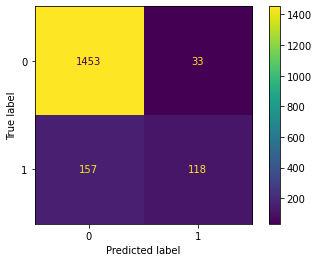

In [42]:
conf_matrix = confusion_matrix(target_test, pred_acc)
CMD = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=final_model.classes_)
CMD.plot();

А также график Roc-кривой.

CatBoostClassifier: ROC AUC=0.89


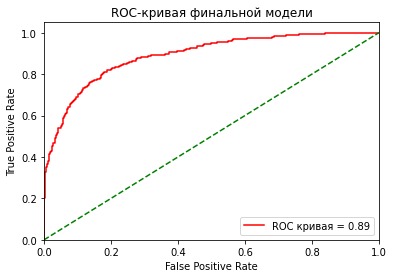

In [43]:
print('CatBoostClassifier: ROC AUC=%.2f' %(test_roc_auc))
fpr, tpr, treshold = roc_curve(target_test, pred_roc)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', label='ROC кривая = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая финальной модели')
plt.legend(loc="lower right")
plt.show()

Вывод:
1. **Анализ важности признаков:**<br>
Как и ранее при анализе данных на мультиколлинеарность мы выявили столбцы СlientDays, TotalCharges и MonthlyCharges - как наиболее связанные с целевым признаком. При построении таблицы важности признаков они же в начале списка. <br>
Кол-во дней в компании естественным образом влияет на то, уйдет ли клиент. <br>
Ежемесячные и общие траты на услуги зависят от состояния клиента, изначальная сумма которую он готов заложить на оплату услуг сети. Поэтому эти признаки тоже имеют вес.<br>
Тип оплаты раз в 2 года влияет так, что клиент с большей вероятностью останется в компании, просто потому что уже оплатил эти 2 года. <br>
2. **Матрица ошибок:**<br>
Построили наглядное распределение прогнозируемых и фактических значений. <br>
Для нас наиболееважным показателем является False Negative. Его значение на матрице ошибок 157.  <br>
Вероятно, мы построили хорошую модель, т.к. значение FN значительно уступает значению TP(практически в 10 раз). <br>
3. **График Roc-кривой:**<br>
Так же построив график Roc-кривой мы наглядно видим, что на тестовых данных показатель правильного предсказания 89%.  <br>
Это хороший показатель, которого мы изначально и добивались.

## 6. Общие выводы

Перед нами поставили задачу прогнозирования оттока клиентов для оператора связи «Ниединогоразрыва.ком». Для выбора наилучшей модели мы обозначили, чтобы метрика качества  AUC-ROC была более 0.85 <br>
1. Загрузка данных.
- мы загрузили все необходимые библиотеки и их обновления
- создали новые переменные для просмотра всех 4 таблиц,предоставленных заказчиком.
- в первичном анализе поняли, что данных немного и решили объединить их в единую таблицу для дальнейшей работы.
2. Предобработка данных:
- Перезаписали EndDate в новый столбец Target, т.к. это наш целевой признак. 1 ставили если клиент ушел, и 0 если он все ещё пользуется нашими услугами.
- В нескольких столбцах мы заполнили пропуски, привели данные к верным типам данных.
- Дубликаты в данных отсутствовали.
- Создали новый признак, который присваивал категорию по кол-ву дней, когда клиент пользовался нашими услугами.
- Мультиколлинеарность наблюдалась среди доп.услуг, ведь если у клиента есть деньги на одну доп.услугу, логично что он возьмет ещё хотя бы одну. Но так как модели, которые мы планировали использовать , не чувствительны к мультиколлинеарности, эти признаки мы не стали удалять.
- Не информативными признаками мы посчитали гендер, наличие иждивенцев, партнеров или преклонный возраст. Эти признаки были удалены.
- Обратно пропорционально ни один из признаков не влиял на целевой признак.
- Мы наблюдали дисбаланс целевого признака 85 к 15, однако тоже отказались от балансировки, тк метрика AUC-ROC не чувствительны к смещению.
3. Обучение моделей:
- Мы выделили целевой и прочие признаки. Поделили данные на тренировочную и тестовую выборки (75:25), методом stratify=target обозначили равномерное распределение в выборках.
- Закодировали данные тренировочной выборки методом OHE, масштабировали StandardScaler. На их основе кодировали и масштабировали тренировочную выборку. 
- Обучили модели Логической регрессии, Решающего дерева и Catboost с использованием GridSearch для подбора параметров. 
- Лучший показатель Roc-Auc = 0.939033 выдала модель CatBoost (гиперпараметры: max_depth=5, iterations=300, random_state константа 30723). 
4. Проверка тестовых данных на модели с лучшим показателем метрики.
- На основе лучшей модели тренировочной выборки нашли следующие показатели метрик для тестовых данных: Auc_Roc = 0.8903976508014193, Accuracy = 0.892106757524134
5. Анализ важности признаков и построение матрицы ошибок.
- Воспользовались методом feature_importances_ для анализа важности признаков, где подтвердили ранее выделенные нами столбцы как наиболее значимые: 
- СlientDays - кол-во проведенных в компании дней напрямую влияло на то, ушел человек или нет.
- TotalCharges и MonthlyCharges	- отражали денежные траты клиентов за месяц и в общем. Вероятнее всего, какие-то виды услуг у нашего заказчика стояли дороже, чем у конкурентов.
- Матрица ошибок наглядно показала, что модель предсказывала True Positive значения в 10 раз чаще, чем False Negative. Здесь можно сделать вывод, что мы построили достойную модель для прогнозирования оттока клиентов для заказчика.
- Так же мы построили Roc-кривую чтобы визуализировать насколько хорошо работает модель.
 <br> <br>
Мы придерживались поставленного плана и выполнили проект не отклоняясь от него. Это может говорить, о достаточно хорошем первичном анализе данных и верной постановке задачи от тим-лида. Полученная модель показала хорошее качество, которое удовлетворяет изначальным пороговым границам. 
